### Imports

In [73]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Useful expressions and functions

In [3]:
DATA_FOLDER = 'data_clean'
# Precomputed regular expression to check if a column is corresponding to a date
IS_DATE = re.compile("^[1-2]{1}[0-9]{3}$")

In [4]:
def describeDf(df,name="DESCRIPTION",level=1):
    """
    Describe the data. Different levels are possible.
    Level 0: Name the different columns
    Level 1: Explore the values of each column
    """
    # Print a header
    print("______________________________ " + name+" ______________________________\n")
    
    date = []
    
    # For level 1
    if(level==1):
        print("\n")
        # Go through the columns
        for col in df.columns:
            # Explore and print the unique values of columns not corresponding to a date
            if((not IS_DATE.match(col)) & (not re.compile("[0-9]+ an").match(col))):
                # Header
                print("         ATTRIBUTE: "+col)
                # Values in the columns
                print("   "+str(df[col].unique()))
                print("\n")
            else:
                date.append(col)
        # Print the dates columns
        print("         VALUES: "+str(date))
        print("\n\n\n")
    # For level 0
    elif(level==0) :
        print(df.columns.values)
        print("\n\n\n")
    # Raise an error if the level value doesn't exist
    else:
        raise NotImplementedError

## Load and describe the data

In [5]:
print("Dataframes available:\n\n")
for file in os.listdir(DATA_FOLDER):
    filename = os.fsdecode(file)
    tablename = "df_"+os.path.splitext(os.path.splitext(filename)[0])[0]
    globals()[tablename] = pd.read_csv(DATA_FOLDER + '/' + filename)
    try:
        globals()[tablename] = globals()[tablename].drop(columns=['Unnamed: 0'])
    except:
        pass
    describeDf(globals()[tablename], name=tablename,level=0)
    

Dataframes available:


______________________________ df_Accident_cantons ______________________________

['canton_index' 'canton' 'gravite_index' 'gravite' 'ruralite_index'
 'ruralite' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017']




______________________________ df_Accident_circonstances ______________________________

['mois_index' 'mois' 'day_index' 'day' 'hours_index' 'hours'
 'gravite_index' 'gravite' 'ruralite_index' 'ruralite' 'contexte_index'
 'contexte' 'circonstance_index' 'circonstance' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017']




______________________________ df_Accident_objets ______________________________

['voiture_index' 'voiture' 'age_index' 'age' 'sexe_index' 'sexe'
 'annee_permis_in

### Evolution of the victims in time

For three different gravities and road types, we plot the evolution in time of the number of victims. We plot only the cantons that had the most victims in 1992 ("number_cantons_to_plot" of them)

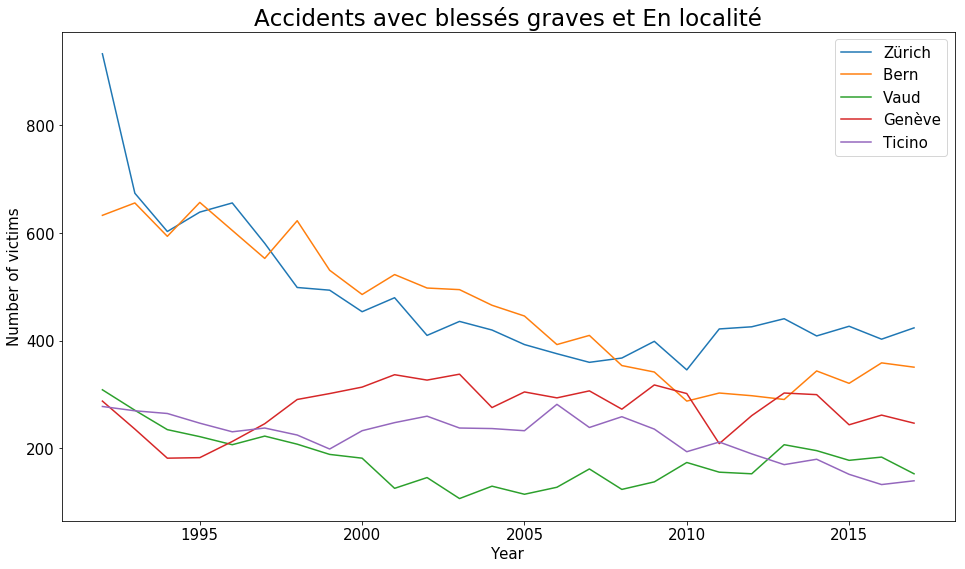

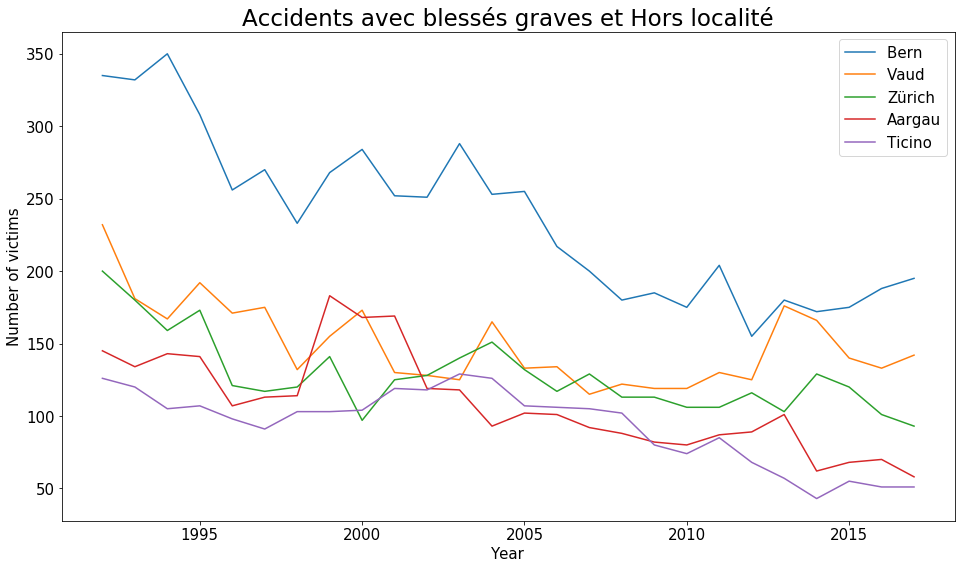

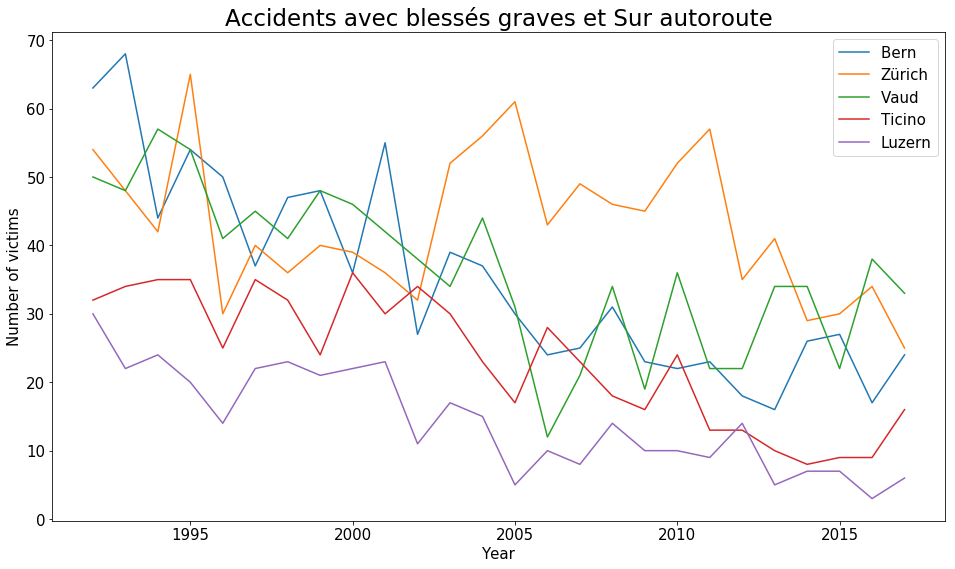

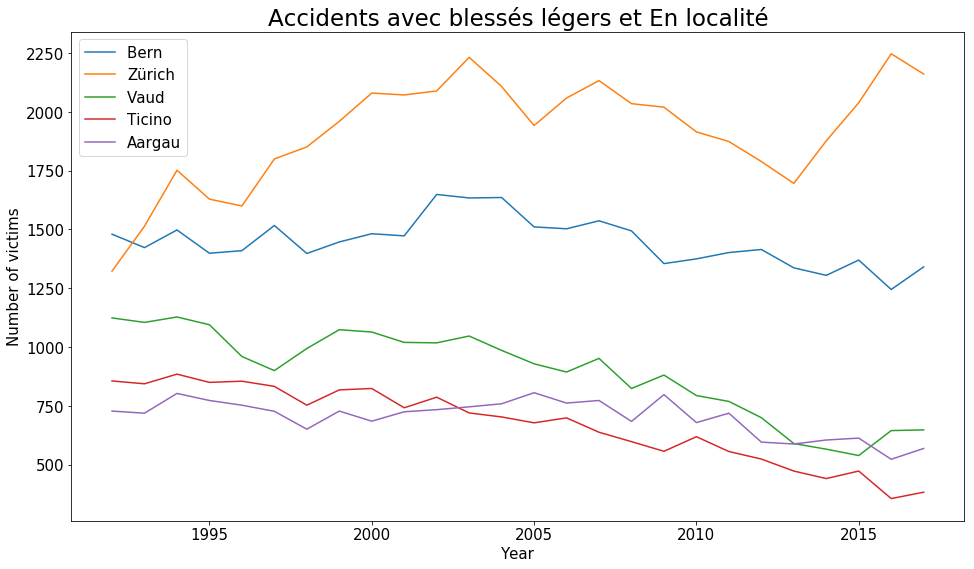

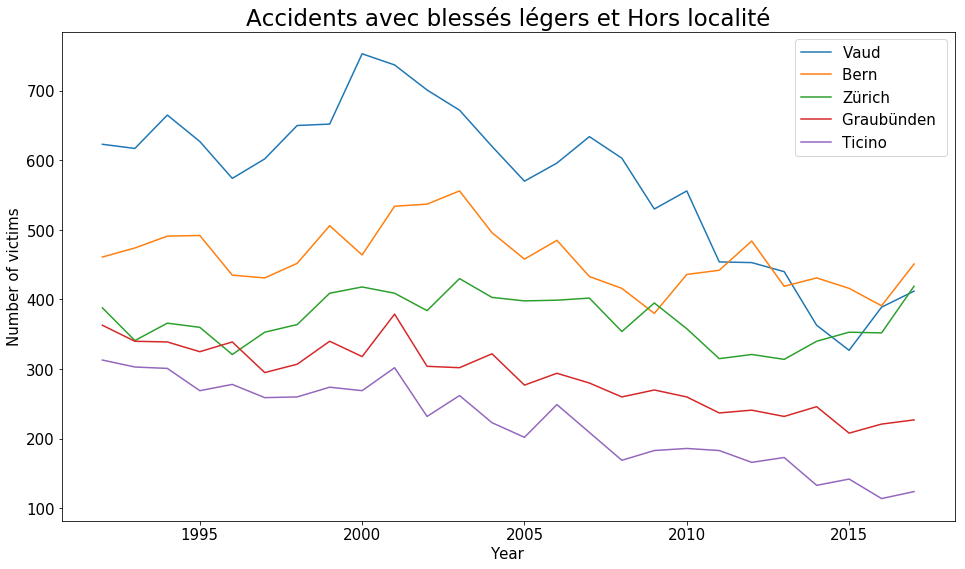

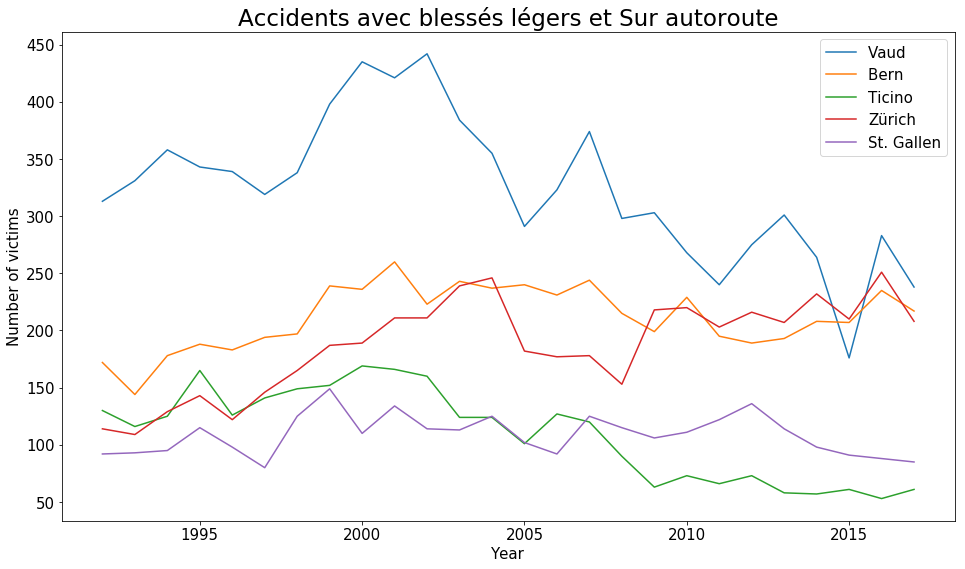

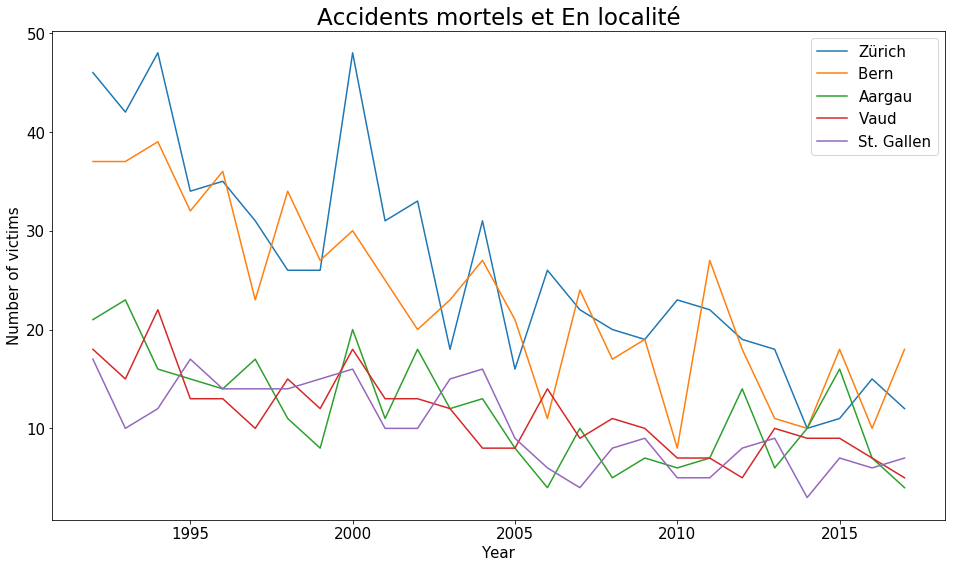

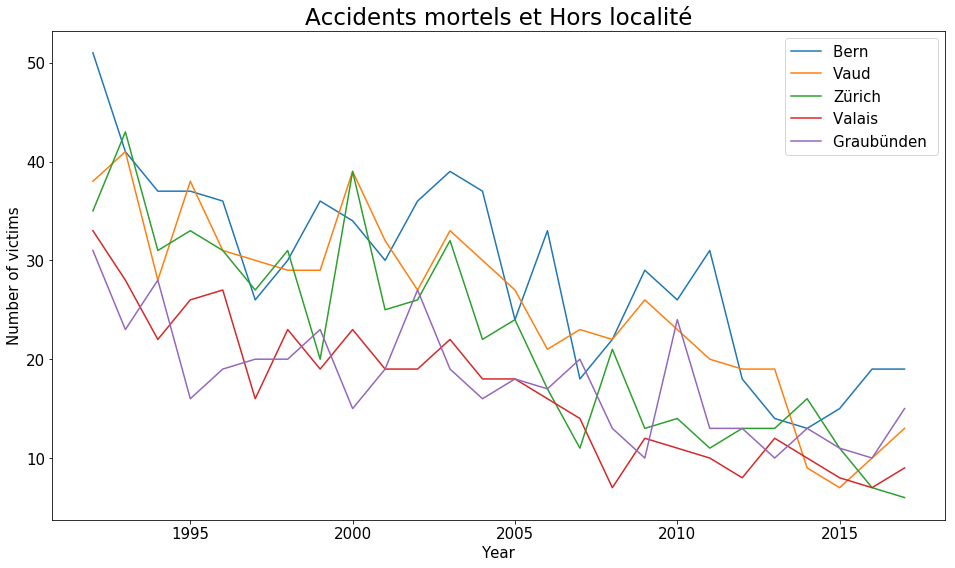

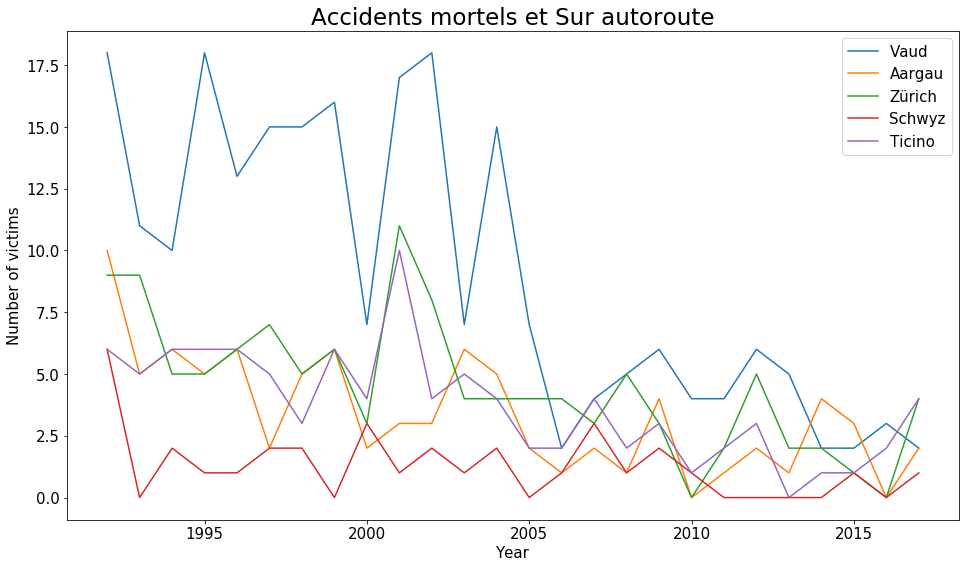

In [6]:
# Number of cantons to plot
number_cantons_to_plot = 5

# Get the information interesting us
victimes_cantons = df_Accident_cantons.drop(columns = \
                            (['canton_index', 'gravite_index', 'ruralite_index']))[:-1]

# Group the accidents by gravity and road type and get the top cantons
victimes_gravite_ruralite = victimes_cantons.groupby(['gravite','ruralite'])\
.apply(lambda x: x.nlargest(number_cantons_to_plot,'1992'))

# Plot them
for i in range(9):
    plt.figure(figsize=(16,9))
    plt.title(victimes_gravite_ruralite.iloc[i*number_cantons_to_plot,1]+\
              ' et '+victimes_gravite_ruralite.iloc[i*number_cantons_to_plot,2],\
              fontsize=23)
    for j in range(number_cantons_to_plot):
        plt.plot(np.arange(1992,2018,1),\
                 victimes_gravite_ruralite.iloc[number_cantons_to_plot*i+j][3:],\
                 label=victimes_gravite_ruralite.iloc[number_cantons_to_plot*i+j,0]\
                 .partition('/')[0])
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Number of victims', fontsize=15)
    plt.show()

### Evolution of the number of victims by gravity

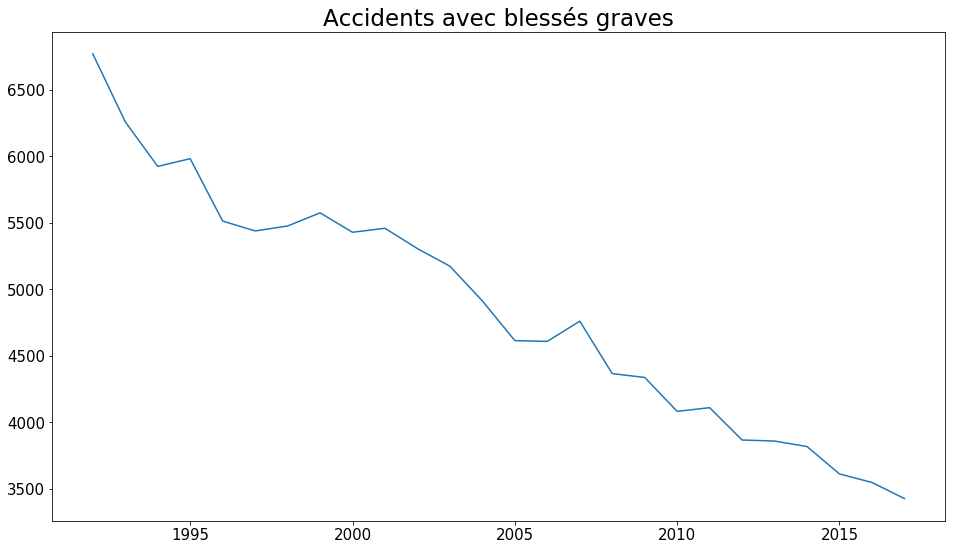

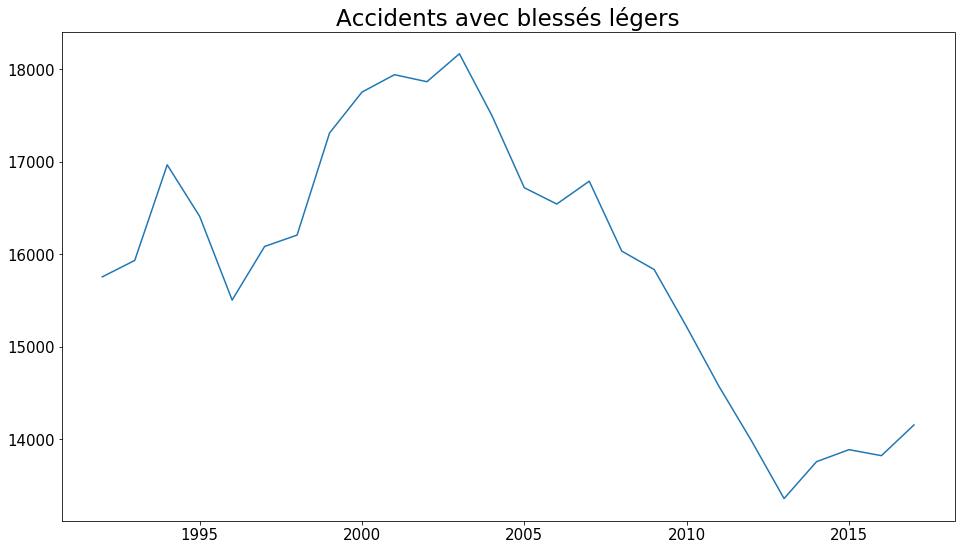

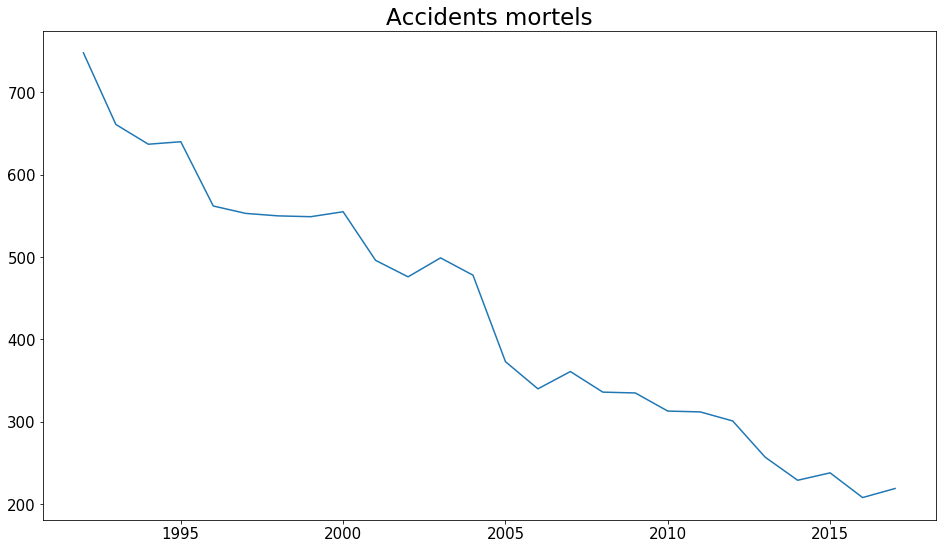

In [7]:
# Group the accidents by gravity 
victimes_gravite = victimes_cantons.groupby(['gravite']).sum()

for i in range(3):
    plt.figure(figsize=(16,9))
    plt.plot(np.arange(1992,2018,1),victimes_gravite.iloc[i])
    plt.title(victimes_gravite.index[i], fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

### Evolution of the number of victims by road type

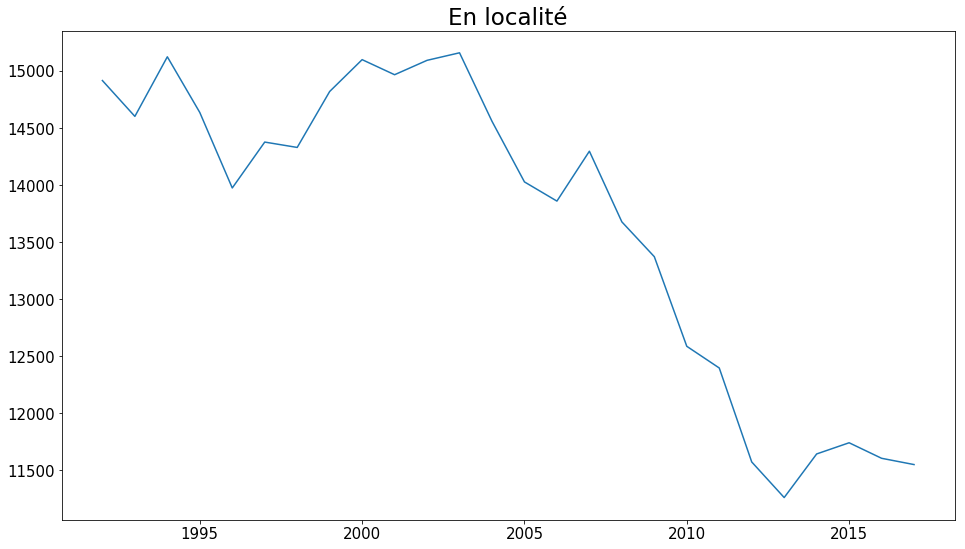

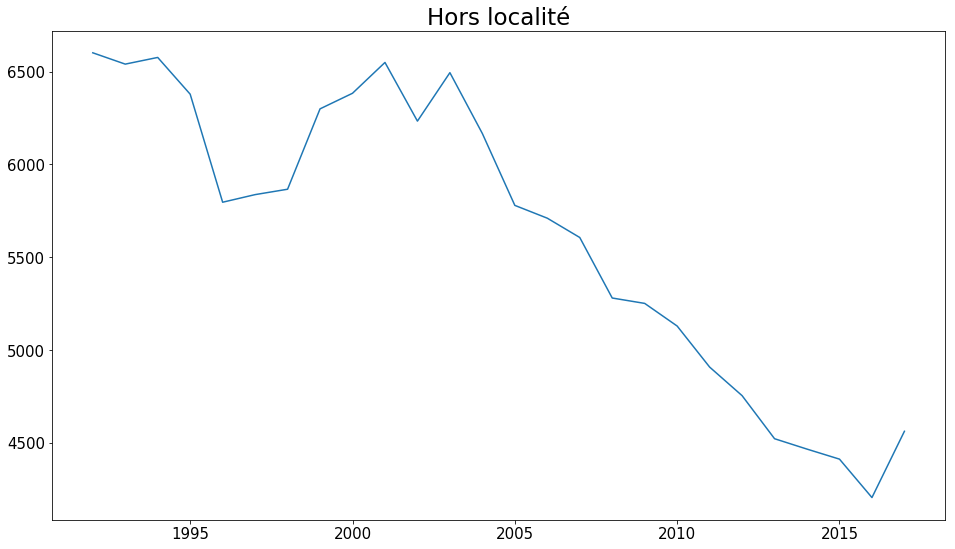

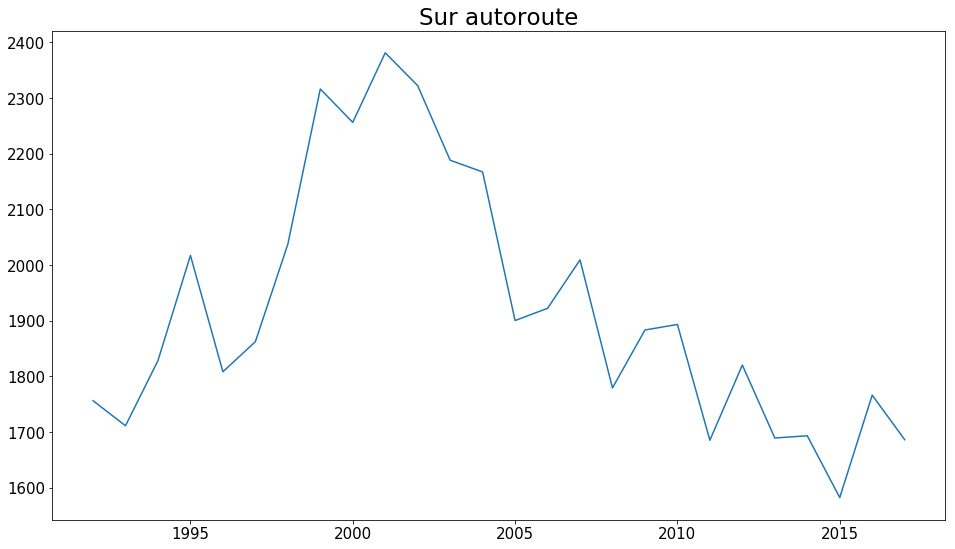

In [8]:
# Group the accidents by gravity 
victimes_ruralite = victimes_cantons.groupby(['ruralite']).sum()

for i in range(3):
    plt.figure(figsize=(16,9))
    plt.plot(np.arange(1992,2018,1),victimes_ruralite.iloc[i])
    plt.title(victimes_ruralite.index[i], fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

#### Total victimes

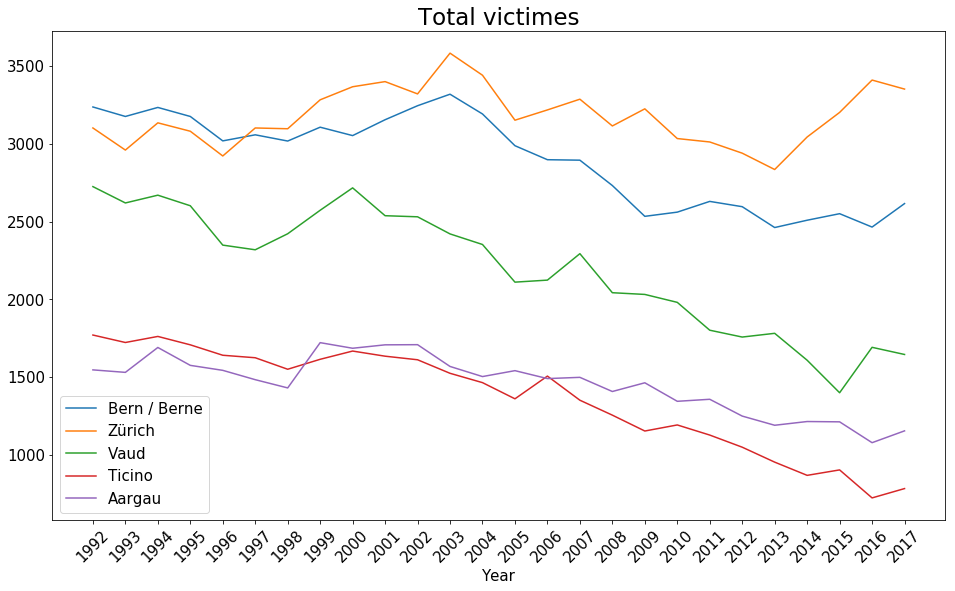

In [9]:
victimes_cantons = victimes_cantons.groupby('canton').sum().sort_values('1992', ascending=False)

plt.figure(figsize=(16,9))
for i in range(number_cantons_to_plot):
    plt.plot(victimes_cantons.columns,victimes_cantons.iloc[i], label= victimes_cantons.index[i])
    plt.title('Total victimes', fontsize=23)
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)
    plt.xlabel('Year', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Depenses linked to road and road security

In [10]:
frais = df_Frais_routes_cantonales
frais['Routes'] = frais[['Constructions', 'Amélio-', 'Entretien Construction',\
                         'Entretien Exploitation']].sum(axis=1)
frais['Somme'] = frais[['Routes', 'Surveillance Policiere']].sum(axis=1)
frais = frais.drop(columns = ['Administration', 'Acquisition', 'Constructions',\
                              'Amélio-', 'Entretien Construction', 'Entretien Exploitation',\
                              'Total'])
frais = frais[(frais['canton']!='Total') & (frais['canton']!='Espace Mittelland')\
              & (frais['canton']!='Suisse du Nord-Ouest') & (frais['canton']!='Région lémanique')\
              & (frais['canton']!='Suisse centrale') & (frais['canton']!='Zentralschweiz')]
frais.head()

,annee,canton,Surveillance Policiere,Routes,Somme
0,1994,Appenzell Rh.-Ext.,2915,26800,29715
1,1994,Appenzell Rh.-Int.,527,2791,3318
2,1994,Argovie,4917,87894,92811
3,1994,Berne,30654,137603,168257
4,1994,Bâle-Campagne,10638,74443,85081


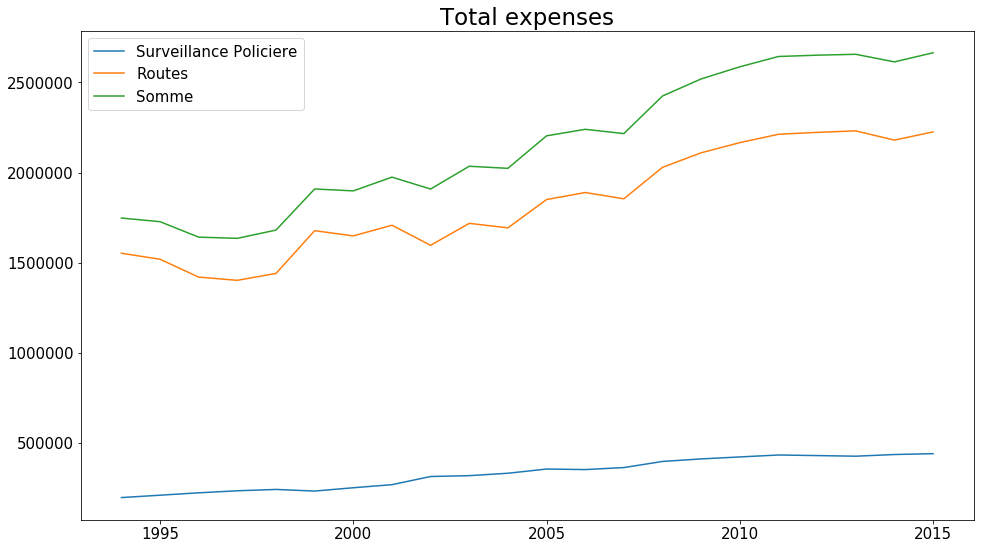

In [11]:
frais_annee = frais.groupby(['annee']).sum()

plt.figure(figsize=(16,9))
for col in frais_annee.columns:
    plt.plot(frais_annee.index,frais_annee[col], label=col)
    plt.title('Total expenses', fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Correlation example

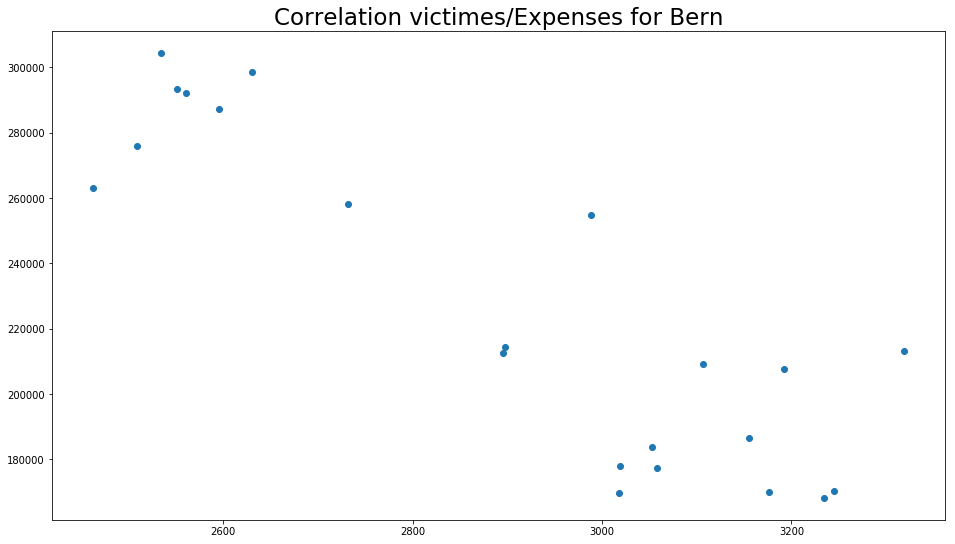

In [12]:
# From 1994 to 2015
victimes_bern = victimes_cantons.loc['Bern / Berne'][2:-2]
frais_bern = frais[frais['canton']=='Berne']

victimes_zurich = victimes_cantons.loc['Zürich'][2:-2]
frais_zurich = frais[frais['canton']=='Zurich']

victimes_vaud = victimes_cantons.loc['Vaud'][2:-2]
frais_vaud = frais[frais['canton']=='Vaud']

victimes_ticino = victimes_cantons.loc['Ticino'][2:-2]
frais_ticino = frais[frais['canton']=='Tessin']

victimes_aargau = victimes_cantons.loc['Aargau'][2:-2]
frais_aargau = frais[frais['canton']=='Argovie']

plt.figure(figsize=(16,9))
plt.scatter(victimes_bern,frais_bern['Somme'])
plt.title('Correlation victimes/Expenses for Bern', fontsize=23)
#plt.xlabel('Victimes number')
#plt.ylabel('Expenses')
plt.show()

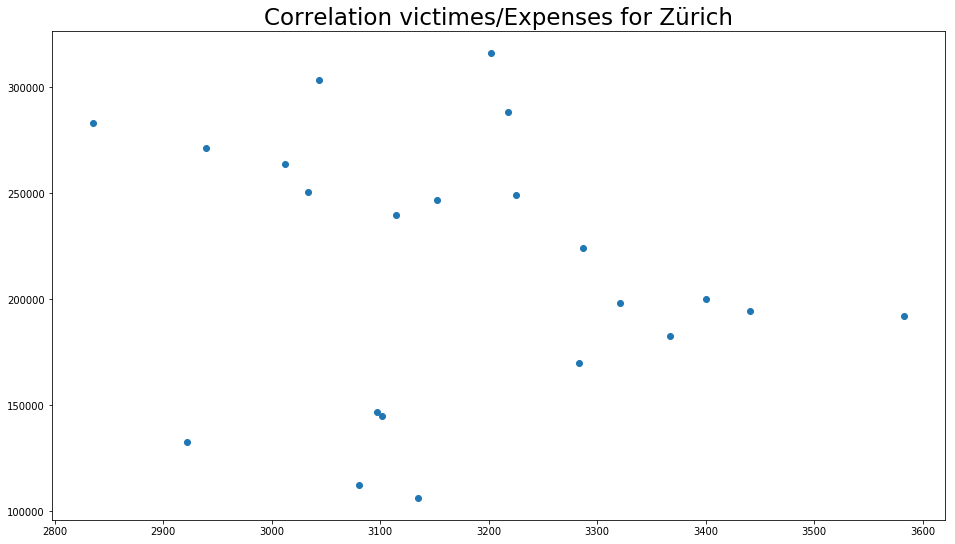

In [13]:
plt.figure(figsize=(16,9))
plt.scatter(victimes_zurich,frais_zurich['Somme'])
plt.title('Correlation victimes/Expenses for Zürich', fontsize=23)
#plt.xlabel('Victimes number')
#plt.ylabel('Expenses')
plt.show()

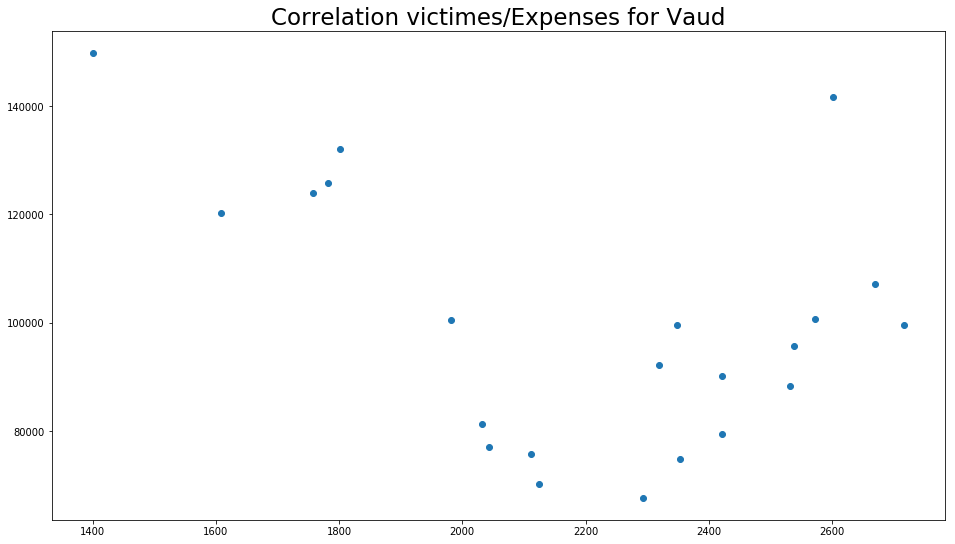

In [14]:

plt.figure(figsize=(16,9))
plt.scatter(victimes_vaud,frais_vaud['Somme'])
plt.title('Correlation victimes/Expenses for Vaud', fontsize=23)
#plt.xlabel('Victimes number')
#plt.ylabel('Expenses')
plt.show()

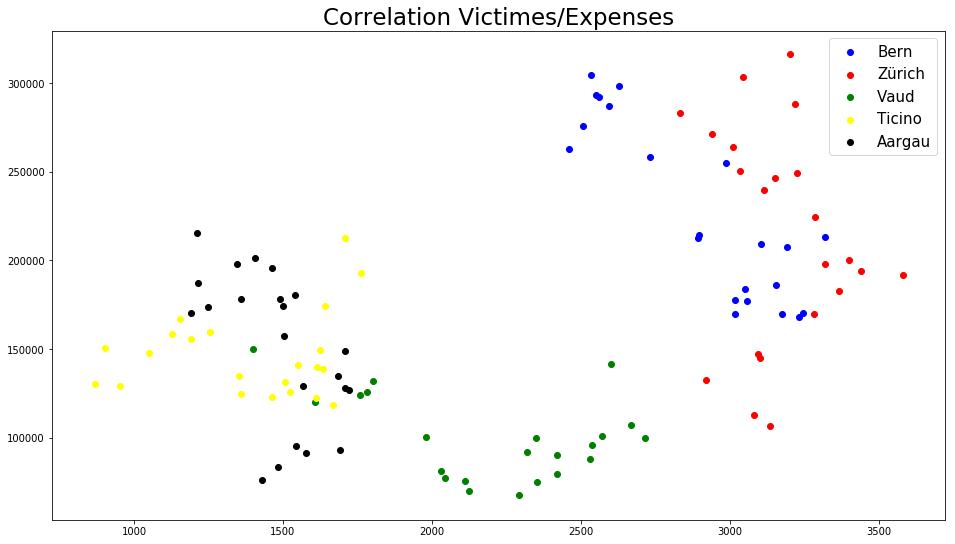

In [15]:
plt.figure(figsize=(16,9))
plt.scatter(victimes_bern,frais_bern['Somme'], c='Blue', label='Bern')
plt.scatter(victimes_zurich,frais_zurich['Somme'], c='Red', label='Zürich')
plt.scatter(victimes_vaud,frais_vaud['Somme'], c='Green', label='Vaud')
plt.scatter(victimes_ticino,frais_ticino['Somme'], c='Yellow', label='Ticino')
plt.scatter(victimes_aargau,frais_aargau['Somme'], c='Black', label='Aargau')
plt.title('Correlation Victimes/Expenses', fontsize=23)
#plt.xlabel('Victimes number')
#plt.ylabel('Expenses')
plt.legend(fontsize=15)
plt.show()

Double correlation kind of:

Les couleurs sont plus ou moins sur la diagonale bas gauche - haut droite -> plus de victimes va avec plus de moyens

Et ensuite par couleur on a une légère correlation négative: plus de moyens diminue un peu les acccidents

### Correlation between new roads and anual victims

Text(0.5,1,'Victimes sur autoroute')

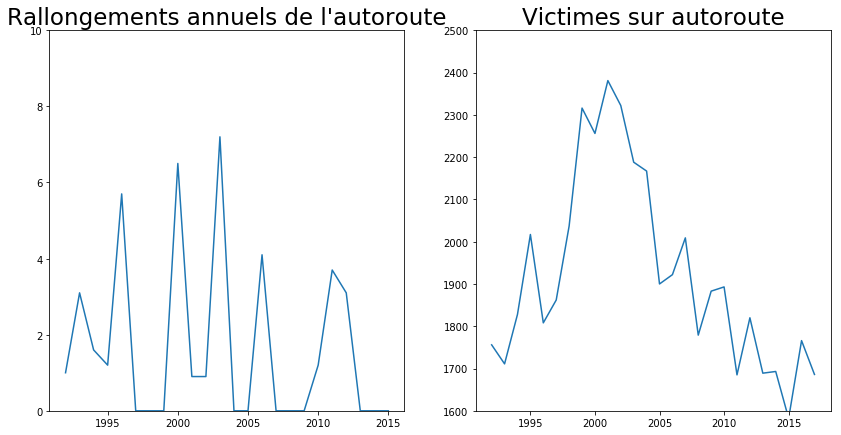

In [97]:
longueur = df_Longueur_routes
longueurBerne = longueur[longueur.canton == 'Berne']
longueurBerne

new_road = []
for i in range(len(longueurBerne['Routes nationales'])-1):
    l0 = longueurBerne.iat[i, 3]
    l1 = longueurBerne.iat[i+1, 3]
    new_road.append(abs(l1-l0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=False)
ax1.plot(np.arange(1992,2016,1),new_road, label = "Rallongements annuels de l'autoroute")
ax1.set_ylim(0,10)
ax1.set_title("Rallongements annuels de l'autoroute", fontsize=23)

ax2.plot(np.arange(1992,2018,1),victimes_ruralite.iloc[2], label = 'Nb accidents')
ax2.set_ylim(1600,2500)
ax2.set_title('Victimes sur autoroute', fontsize=23)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()



In [98]:
xRd = new_road
yVictimes = victimes_ruralite.iloc[2, 1:25]
cor,p = stats.pearsonr(xRd, yVictimes)
cor, p
# print(xRd, yVictimes)

(0.24013746227548802, 0.25836530792115564)

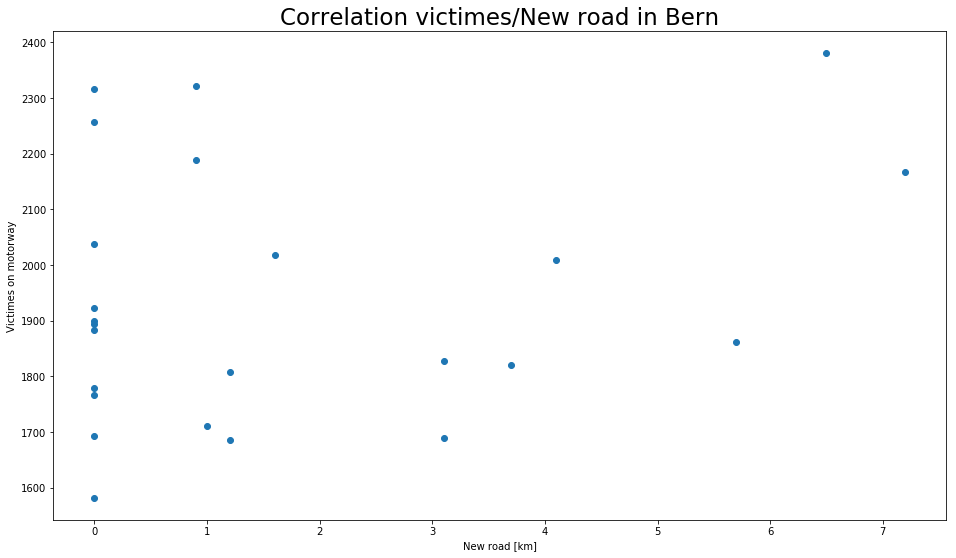

In [99]:
plt.figure(figsize=(16,9))
plt.scatter(xRd,yVictimes)
plt.title('Correlation victimes/New road in Bern', fontsize=23)
plt.xlabel('New road [km]')
plt.ylabel('Victimes on motorway')
plt.show()